In [ ]:
from sklearn.preprocessing import MinMaxScaler
from google.colab import files
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
uploaded = files.upload()

Saving data.csv to data (1).csv


In [ ]:
df = pd.read_csv('data.csv')
df.head(100)

,id,site,timestamp,vibration,sound,WaterPressure
0,1,2,2023-08-01T14:43:33.000Z,0,38,188
1,2,2,2023-08-01T14:43:35.000Z,0,38,150
2,3,2,2023-08-01T14:43:36.000Z,0,38,38
3,4,2,2023-08-01T14:43:37.000Z,0,38,167
4,5,2,2023-08-01T14:43:38.000Z,0,37,124
...,...,...,...,...,...,...
95,96,2,2023-08-01T14:44:57.000Z,0,38,141
96,97,2,2023-08-01T14:44:58.000Z,0,38,138
97,98,2,2023-08-01T14:44:58.000Z,0,38,152
98,99,2,2023-08-01T14:44:58.000Z,0,38,163


In [ ]:
df1 = df[df['site']=='1']
df1 = df1[['sound', 'WaterPressure']]
df1.head()

,sound,WaterPressure
822,480,146
824,478,114
826,483,162
828,481,135
831,482,97


In [ ]:
df2 = df[df['site']=='2']
df2 = df2[['sound', 'WaterPressure']]
df2.head()

,sound,WaterPressure
0,38,188
1,38,150
2,38,38
3,38,167
4,37,124


In [ ]:
len(df1), len(df2)

(44093, 42671)

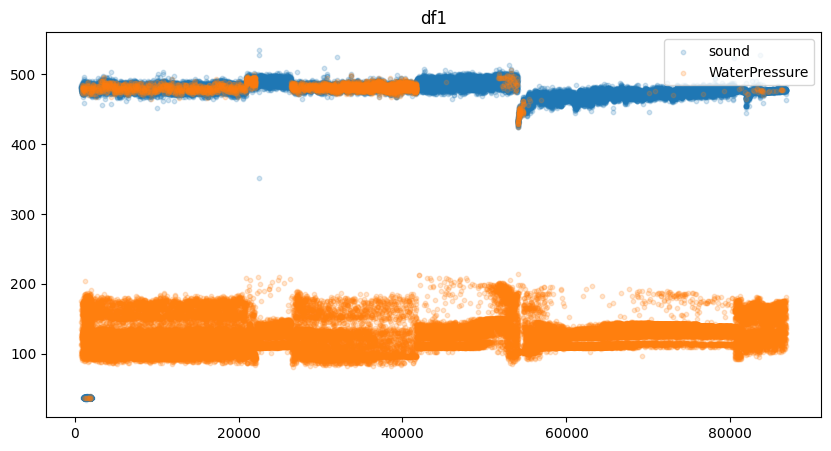

In [ ]:
plt.figure(figsize=(10,5))
plt.title('df1')
plt.scatter(x=list(df1.index),y=df1['sound'],label="sound", alpha=0.2, s=10)
plt.scatter(x=list(df1.index),y=df1['WaterPressure'], label="WaterPressure", alpha=0.2, s=10)
plt.legend(loc='upper right')

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df1) ## 각 칼럼 데이터마다 변환할 함수 생성
X_scaled = scaler.transform(df1) ## fit에서 만들어진 함수를 실제로 데이터에 적용
scaled_df1 = pd.DataFrame(X_scaled)
scaled_df1.columns = ['sound', 'WaterPressure']
scaled_df1

,sound,WaterPressure
0,0.890220,0.235669
1,0.886228,0.167728
2,0.896208,0.269639
3,0.892216,0.212314
4,0.894212,0.131635
...,...,...
44088,0.856287,0.256900
44089,0.886228,0.178344
44090,0.882236,0.301486
44091,0.882236,0.276008


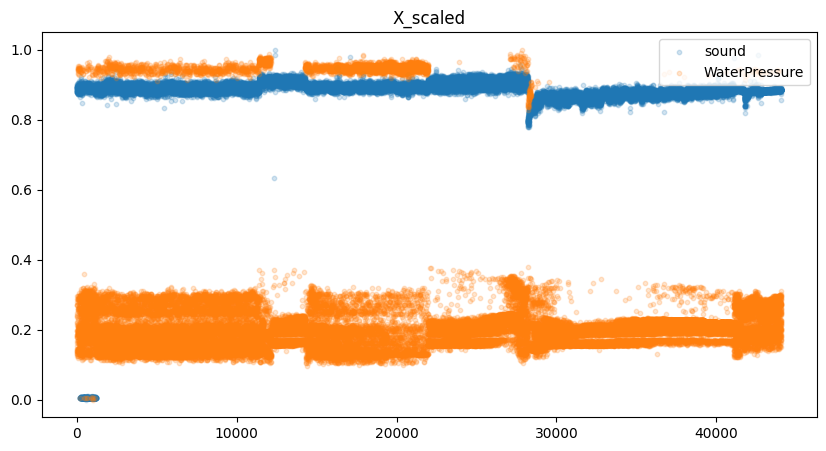

In [ ]:
plt.figure(figsize=(10,5))
plt.title('X_scaled')
plt.scatter(x=list(scaled_df1.index),y=scaled_df1['sound'],label="sound", alpha=0.2, s=10)
plt.scatter(x=list(scaled_df1.index),y=scaled_df1['WaterPressure'], label="WaterPressure", alpha=0.2, s=10)
plt.legend(loc='upper right')

In [ ]:
seq_len=10 # 10초 (1sec 단위로 수집)

def create_sequences(df, seq_len=seq_len):
    output = []
    values = df.values

    for i in range(len(values) - seq_len + 1):
        output.append(values[i : (i + seq_len)])

    sequence_set = np.stack(output)
    print("sequences shape:", sequence_set.shape)

    return sequence_set

In [ ]:
sequence_df1 = create_sequences(scaled_df1)
sequence_df1 #(44084, 10, 2) 시퀀스개수, 시퀀스길이, 피쳐개수

In [ ]:
def lstm_ae(mtype=mtype, optimizer=optimizer, loss=loss, strategy=strategy, seq_len=seq_len, n_features=n_features):
    with strategy.scope():
        model = keras.Sequential()
        model.add(LSTM(16, input_shape=(seq_len, n_features), return_sequences=True))
        model.add(LSTM(2, return_sequences=False))
        model.add(RepeatVector(seq_len))
        model.add(LSTM(2, return_sequences=True))
        model.add(LSTM(16, return_sequences=True))

        model.add(TimeDistributed(Dense(n_features)))
        model.compile(optimizer=optimizer, loss=loss)
    return model